# 1. 문제설정
- 영화별로 네티즌들의 생각이 궁금하다!
- 어떤 정보를 확보하는게 좋을까? -> 별점, 누적관객수, 연령대, 리뷰, 블로그 글

# 2. 데이터 확보
- 네이버 블로그에 작성된 글

In [2]:
import requests as req
import time

from bs4 import BeautifulSoup as bs

In [3]:
# 1. 페이지 요청
import requests as req
from bs4 import BeautifulSoup as bs

header_info = {
    "user-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36"
}

In [4]:
# 1. 페이지 요청
m_search_url = "https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=29282372&qvt=0&query=%EC%98%81%ED%99%94%20%ED%95%98%EC%96%BC%EB%B9%88%20%EB%A6%AC%EB%B7%B0"
res = req.get(m_search_url, headers = header_info)

In [8]:
# 2. 문자열 웹 문서 -> 파이썬으로 변환 
html =bs(res.text, "lxml")

In [9]:
# 3. 영화 리뷰 블로그 URL 수집
blogs = html.select("dt > a.review_link")

len(blogs)

10

In [10]:
blogs[0]

<a class="review_link" href="https://blog.naver.com/dance8090/223705340842" nocr="" onclick="return goOtherCR(this, 'a=nco_x0a*A.tabreviewrtitle&amp;r=1&amp;i=1800009D_000001BED044&amp;u=' + urlencode(this.href));"> <span class="this_text">영화: 하얼빈 (후기/정보/아트카드) &lt;영상미는 확실히 좋음&gt;</span> </a>

In [14]:
# 실습) blogs 리스트 내 모든 a요소의 href 속성값 수집하기
href_list = []

for i in blogs:
    href_list.append(i.get("href"))

href_list

['https://blog.naver.com/dance8090/223705340842',
 'https://blog.naver.com/zjvl851/223703838292',
 'https://blog.naver.com/kaminari2002/223704644583',
 'https://blog.naver.com/silver1ne/223704905346',
 'https://blog.naver.com/c106507/223704055062',
 'https://blog.naver.com/ljb1202/223704441543',
 'https://blog.naver.com/pooh0512/223704945483',
 'https://blog.naver.com/houself/223704113174',
 'https://blog.naver.com/luckymasiwoo/223701325768',
 'https://blog.naver.com/dongi0508/223703227305']

In [16]:
# 4. 블로그 URL 요청
res2 = req.get(href_list[0], headers = header_info)
html2 = bs(res2.text, "lxml")

In [21]:
# 5. iframe의 src속성값을 추출하여 실제 블로그 URL 주소 생성하기
src = html2.select_one("iframe").get("src")
blog_url = f"https://blog.naver.com{src}"

blog_url

'https://blog.naver.com/PostView.naver?blogId=dance8090&logNo=223705340842&redirect=Dlog&widgetTypeCall=true&noTrackingCode=true&directAccess=false'

In [22]:
# 6. 실제 블로그 URL 페이지 요청
blog_res = req.get(blog_url, headers = header_info)
blog_html = bs(blog_res.text, "lxml")

In [25]:
blog_html

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html lang="ko">
<head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="always" name="referrer"/>
<!--[if ie]>
<style type="text/css">
html {overflow: scroll; overflow-x: auto;}
</style>
<![endif]-->
<link charset="UTF-8" href="https://ssl.pstatic.net/t.static.blog/mylog/versioning/LayoutTopCommon-491376861_https.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/t.static.blog/mylog/versioning//common/css/music/player-d3fc09e_https.css" rel="stylesheet" type="text/css"/>
<link href="/favicon.ico?3" rel="shortcut icon" type="image/x-icon"/>
<meta content="영화: 하얼빈 (후기/정보/아트카드) &lt;영상미는 확실히 좋음&gt;" property="og:title"/>
<meta content="https://blogthumb.pstatic.net/MjAyNDEyMjVfOTcg/MDAxNzM1MTMwNTA1MTE3.g_qpf443yUDsaldqA9ruKqd6opVuAMCC3OXOw8i2i-og.aSnOzjSytwr44V2a6IHQ96u2NYA_NnH2EJM4LTaEXqMg.PNG/900%A3%DF%C7%C

In [29]:
import re

def preprocess_sentence_kr(w):
  w = w.strip()
  w = re.sub(r"[^0-9가-힣?.!,¿]+", " ", w)
  w = w.strip()
  return w

In [37]:
# 7.블로그 내용 추출
content = blog_html.select_one("div.se-main-container")

content = preprocess_sentence_kr(content.text)

In [45]:
# 8. 텍스트 파일로 저장
# open(저장할 경로, 권한)
# 저장할 경로 : 파일명.확장자 또는 폴더명/파일명.확장자 형태로 정의
# 권한: w(쓰기), r(읽기)
f = open('blog_review.txt', 'w')
f.write(content)
f.close()

In [52]:
from tqdm import tqdm

In [57]:
# 코드 통합 

f = open('blog_review.txt', 'w')

for i in tqdm(range(len(href_list))):
    # 4. 블로그 URL 요청
    res2 = req.get(href_list[i], headers = header_info)
    html2 = bs(res2.text, "lxml")
    
    # 5. iframe의 src속성값을 추출하여 실제 블로그 URL 주소 생성하기
    src = html2.select_one("iframe").get("src")
    blog_url = f"https://blog.naver.com{src}"
    
    # 6. 실제 블로그 URL 페이지 요청
    blog_res = req.get(blog_url, headers = header_info)
    blog_html = bs(blog_res.text, "lxml")
    
    # 7.블로그 내용 추출
    content = blog_html.select_one("div.se-main-container")
    
    content = preprocess_sentence_kr(content.text)
    f.write(content)

    time.sleep(1.5)
    
f.close()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:17<00:00,  1.74s/it]


# 영화 리뷰 데이터 명사 추출

In [4]:
!pip install wordcloud

In [5]:
!pip install konlpy

In [1]:
from wordcloud import WordCloud # 워드클라우드 생성에 활용
#from konlpy.tag import Okt # 명사 추출에 활용
#from collections import Counter # 단어가 언급된 횟수를 카운팅

import matplotlib.pyplot as plt

In [2]:
# 텍스트 파일 불러오기
f = open("blog_review.txt","r")
review = f.readline()
f.close()

In [3]:
review

'영화 하얼빈 후기 정보 리뷰 아트카드 크리스마스 성탄절 신작 영화 하얼빈 관람하고 왔습니다. 올해는 코로나 2020년도를 제외하고 이후 가장 영화를 적게 봤는데 하얼빈이 2024년 영화관 마지막 관람 영화가 아닐까합니다. 롯데시네마 광복점에서 관람했고 아트카드 재고는 넉넉해서 받는데 별 무리 없었지만 그냥 종이카드다 그런 느낌이라 소장가치는 그닥 높지않습니다. 9관 수퍼플렉스 408석 상영관인데 첫줄 빼고 중간중간 빈자리 빼고 364석이 관객들로 찼습니다. 성탄절이라 그런지 시내로 나온분들 너무 많아서 극심한 차량 정체로 상영시간에 늦어서 앞부분 조금 놓쳤습니다. 개봉일과 다음날 크리스마스까지 관객들 반응이 상당히 좋은데 대작 신작이 나오기전까지는 그런대로 많이 보실것 같습니다. 영화속 등장하는 중요한 장소가 블라디보스토크와 하얼빈인데 위치를 알려드리자면 러시아의 블라디보스토크는 북한 끝에서 오른쪽으로 조금만 가면 있고 중국 하얼빈은 한국에서 그대로 계속 올라가면 있습니다. 하얼빈이 영화에서 보면 옛날에는 러시아 땅으로 나오는데 현재는 중국땅입니다. 하얼빈은 1909년 일본의 이토 히로부미가 러시아의 하얼빈으로 러시아 재무상을 만난다는 정보를 입수한 후 안중근, 우덕순, 조도선, 유동하 등이 함께 계획을 세워 이토 히로부미를 죽이게되는 실화 기반의 역사 시대극 영화입니다. 실화 기반의 영화라 사실 내용은 특별할게 없고 결말 결과를 알고 보는거라 스토리 전개도 새로울건 없었지만 블라디보스토크의 모습이나 사막, 얼음판, 열차 실내와 실외까지 영상미에 신경을 상당히 많이 써서 큰 스크린을 눈으로 보는 맛이 있었습니다. 뭔가 뮤지컬 연극을 본다는 그런 느낌이 드는 장면도 간혹 있었는데 특히 안중근의 마지막 장면이 노래만 부른다면 뮤지컬 느낌이 날것 같더라구요. 2022년 12월 개봉한 뮤지컬 영화 영웅도 안중근 의사의 이야기였는데 하얼빈과 영웅은 뮤지컬과 일반 영화의 차이점이 있어서 그런가 유사하다는 느낌은 못받았습니다. 하얼빈의 우민호 감독은 내부자들, 마약왕, 

In [19]:
wc = WordCloud(
    font_path="c:/windows/Fonts/malgunbd.ttf",
    background_color="white"
).generate(review)


In [20]:
wc.words_

{'영화 하얼빈': 1.0,
 '영화': 0.7948717948717948,
 '안중근': 0.717948717948718,
 '이': 0.717948717948718,
 '그': 0.6923076923076923,
 '수': 0.5384615384615384,
 '위해': 0.4358974358974359,
 '잘': 0.38461538461538464,
 '한': 0.38461538461538464,
 '있는': 0.358974358974359,
 '박정민 조우진': 0.358974358974359,
 '영화를': 0.3333333333333333,
 '영화가': 0.3333333333333333,
 '그런': 0.3333333333333333,
 '합니다': 0.3333333333333333,
 '하얼빈 은': 0.3333333333333333,
 '많이': 0.3076923076923077,
 '우덕순': 0.3076923076923077,
 '그리고': 0.3076923076923077,
 '하지만': 0.3076923076923077,
 '을': 0.3076923076923077,
 '건': 0.3076923076923077,
 '현빈 박정민': 0.3076923076923077,
 '릴리 프랭키': 0.3076923076923077,
 '마지막': 0.28205128205128205,
 '안중근의': 0.28205128205128205,
 '내부자들': 0.28205128205128205,
 '등': 0.28205128205128205,
 '하얼빈': 0.2564102564102564,
 '있습니다': 0.2564102564102564,
 '통해': 0.2564102564102564,
 '것': 0.2564102564102564,
 '하얼빈 스틸': 0.2564102564102564,
 '스틸 컷': 0.2564102564102564,
 '조우진 전여빈': 0.2564102564102564,
 '전여빈 박훈': 0.2564102564102564,


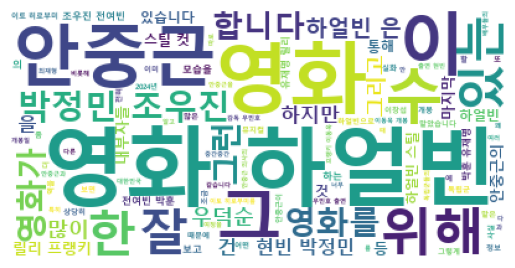

In [26]:
plt.imshow(wc)
plt.axis("off")
plt.show()